In [1]:
import sys

setupFlag = False ## Set flag to True if these aren't installed
if setupFlag:
    !{sys.executable} -m pip install astroquery
    ## https://github.com/astropy/astroquery
    !{sys.executable} -m pip install eleanor
    ## https://github.com/afeinstein20/eleanor
    !{sys.executable} -m pip install lightkurve
    ## https://github.com/KeplerGO/lightkurve
    !{sys.executable} -m pip install sncosmo

In [2]:
from useful_functions import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
sn2020bpi_s21_dir = './Fausnaugh_Updated/sector21/cam3_ccd2/lc/lc_2020bpi_cleaned'
sn2020bpi_s21 = lcImport(sn2020bpi_s21_dir)
sn2020bpi_s21['cts_median'] = sn2020bpi_s21['cts'].rolling(24).median()
sn2020bpi_s21['e_cts_median'] = sn2020bpi_s21['e_cts'].rolling(24).median()
sn2020bpi_s21['mjd'] = Time(sn2020bpi_s21['BTJD']+2457000.0, format='jd').mjd

##cutting off some odd data from s21
sn2020bpi_s21_fixed = sn2020bpi_s21#[(sn2020bpi_s21['BTJD'] > 1872)]
#sn2020bpi_s21_fix = (1884.5,1886.5)
#sn2020bpi_s21_fixed = sn2020bpi_s21_fixed[(sn2020bpi_s21_fixed['BTJD'] < sn2020bpi_s21_fix[0]) | (sn2020bpi_s21_fixed['BTJD'] > sn2020bpi_s21_fix[1])]

sn2020bpi_s22_dir = './Fausnaugh_Updated/sector22/cam3_ccd1/lc/lc_2020bpi_cleaned'
sn2020bpi_s22 = lcImport(sn2020bpi_s22_dir)
sn2020bpi_s22['cts_median'] = sn2020bpi_s22['cts'].rolling(24).median()
sn2020bpi_s22['e_cts_median'] = sn2020bpi_s22['e_cts'].rolling(24).median()
sn2020bpi_s22['mjd'] = Time(sn2020bpi_s22['BTJD']+2457000.0, format='jd').mjd

sn2020bpi_s22_fix = (1912,1914.5)
sn2020bpi_s22_fixed = sn2020bpi_s22.query('BTJD > 1900')
sn2020bpi_s22_fixed = sn2020bpi_s22_fixed[(sn2020bpi_s22_fixed['BTJD'] < sn2020bpi_s22_fix[0]) | (sn2020bpi_s22_fixed['BTJD'] > sn2020bpi_s22_fix[1])]


sn2020bpi_s21s22 = pd.concat([sn2020bpi_s21_fixed,sn2020bpi_s22_fixed])
sn2020bpi_s21s22['cts_bkg_model_sub'] = sn2020bpi_s21s22['cts'] - sn2020bpi_s21s22['bkg_model']

In [4]:
sn2020bpi_peak_iso = Time('2020-02-14', format='iso')
sn2020bpi_peak_btjd = sn2020bpi_peak_iso.jd - 2457000.0

In [5]:
ax = sn2020bpi_s21_fixed.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21_fixed.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
# plt.axvspan(min(sn2020bpi_s21['BTJD']),
#            1872,
#            facecolor='black',alpha=0.2)
# plt.axvspan(sn2020bpi_s21_fix[0],
#            sn2020bpi_s21_fix[1],
#            facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector21, cam3_ccd2) (Updated)')
plt.show()
#display_side_by_side(sn2020bpi_s21)

<IPython.core.display.Javascript object>

In [6]:
ax = sn2020bpi_s22_fixed.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s22_fixed.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0], ##See why this is needed at some point
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector22, cam3_ccd1) (Updated)')
plt.show()
#plt.savefig('sn2020bpi_s22_fixed.png')

<IPython.core.display.Javascript object>

In [7]:
ax = sn2020bpi_s21s22.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.05, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21s22.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
# plt.axvspan(min(sn2020bpi_s21['BTJD']),
#            1872,
#            facecolor='black',alpha=0.2)
# plt.axvspan(sn2020bpi_s21_fix[0],
#            sn2020bpi_s21_fix[1],
#            facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0],
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22_fixed['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (Sector 21 & Sector 22) (Updated)')
plt.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

In [8]:
# pfit = np.polynomial.polynomial.Polynomial.fit(x=(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']-1875),
#                                                y=sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['cts'],
#                                                deg=2)
# curve_fit = pd.DataFrame(data={'BTJD':[sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']],
#                     'cts':[pfit(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD'])]})


ax = sn2020bpi_s21s22.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.05, kind='scatter', label='Fausnaugh Corrected Counts')
ax.set_ylim(sn2020bpi_s21s22['cts'].min()*1.1,sn2020bpi_s21s22['cts'].max()*1.1)
# curve_fit.plot(x='BTJD', y='cts',
#                color='orange',kind='line',label=np.str('polyfit ('+np.str(pfit)+')'))
# ax.plot(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD'], 
#          pfit((sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']-1875)),
#         color='orange')
sn2020bpi_s21s22.plot(x='BTJD', y='bkg_model', 
                      color='purple', alpha=0.2, kind='scatter', label='bkg_model',ax=ax)
sn2020bpi_s21s22.plot(x='BTJD', y='bkg',
                      color='green', alpha=0.2, kind='scatter', label='bkg',ax=ax)


<IPython.core.display.Javascript object>

In [9]:
# display_side_by_side( sn2020bpi_s21s22)

sn2020bpi_s21s22.plot('BTJD','e_cts',kind='scatter')

<IPython.core.display.Javascript object>

In [10]:
# ax = sn2020bpi_s21s22.plot(x='BTJD', y='bkg', 
#                       color='blue', alpha=0.05, kind='scatter',s=10,label='bkg')
fig,ax = plt.subplots(1,1)
#ax.set_yscale('symlog')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['bkg2'].rolling(96).median(),color='red',s=10,alpha=0.05,label='bkg2')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['bkg_model'].rolling(96).median(),color='green',s=10,alpha=0.05,label='bkg_model')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['cts'].rolling(96).median(),color='orange',s=10,alpha=0.2,label='cts')
plt.legend()


<IPython.core.display.Javascript object>

In [11]:
def cts_sub_bkg_pen(params,subItem):
    return (sn2020bpi_s21s22['cts']-(params[0]*sn2020bpi_s21s22[np.str(subItem)]+params[1])
            /sn2020bpi_s21s22['e_cts'])
## Getting weird error: "TypeError: cts_sub_bkg_pen() takes 2 positional arguments but 10 were given"
# cts_bkg_scale_params = optimize.least_squares(cts_sub_bkg_pen,x0=[10,1000],args=('bkg_model'))

In [12]:
ab = sncosmo.get_magsystem('ab')
tess_response = pd.read_csv('./tess_response_curve.csv',header=0,names=['wl_nm','trans'])
tess_response['wl_ang'] = (np.array(tess_response['wl_nm']) * u.nm).to_value('angstrom')

atlaso_response = pd.read_csv('./atlas_o.csv',header=0,names=['wl_ang','trans'])


sn2020bpi_ztf = pd.read_csv('./sn2020bpi_ztf.csv',header=0)
sn2020bpi_ztf['BTJD'] = Time(sn2020bpi_ztf['mjd'],format='mjd').jd - 2457000.0
sn2020bpi_ztf['magap_rolling'] = sn2020bpi_ztf['magap'].rolling(12).median()
sn2020bpi_ztf['flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['magap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['magap']))]
sn2020bpi_ztf['flux_rolling'] = sn2020bpi_ztf['flux'].rolling(12).median()
#sn2020bpi_ztf['sig_flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['sigmagap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['sigmagap']))]
## Sig Flux is wrong
sn2020bpi_atlas = pd.read_csv('./sn2020bpi_atlas.csv',header=0)
sn2020bpi_atlas.replace(to_replace='orange-ATLAS',value='orange',inplace=True) ## covers 560-820 nm (closest to tess)
sn2020bpi_atlas.replace(to_replace='cyan-ATLAS',value='cyan',inplace=True) ## covers 420-650 nm
atlas_o = sn2020bpi_atlas[sn2020bpi_atlas.FLT == 'orange']
#sn2020bpi_atlas
# sn2020bpi_ztf

In [13]:
ztfmag_err = [(magap+sigmagap, ## lower uncertainty
          magap-sigmagap) ## upper uncertainty
          for magap,sigmagap in zip(sn2020bpi_ztf['magap'],sn2020bpi_ztf['sigmagap'])]

sn2020bpi_ztf['sigflux'] = [(np.abs(ab.band_mag_to_flux(fluxErr[0], 'ztfr')-flux),
                                np.abs(ab.band_mag_to_flux(fluxErr[1], 'ztfr')-flux))
                           for fluxErr,flux in zip(ztfmag_err,sn2020bpi_ztf['flux'])]

# display_html(sn2020bpi_ztf)

In [14]:
tess_band = sncosmo.Bandpass(tess_response['wl_ang'],tess_response['trans'],name='tess')
sncosmo.register(tess_band,force=True)

atlaso_band = sncosmo.Bandpass(atlaso_response['wl_ang'],atlaso_response['trans'],name='atlaso')
sncosmo.register(atlaso_band,force=True)

In [15]:
ax = sn2020bpi_ztf.query('fid == 2').plot(x='BTJD',y='magap', ylim=(22,16), kind='scatter',alpha=1)
plt.axvline(x= sn2020bpi_s21s22['BTJD'].min(), color='black',alpha=0.5)
plt.axvline(x= sn2020bpi_s21s22['BTJD'].max(), color='black',alpha=0.5)
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvline(x=1917, color=(0.8,0.4,0), 
            linestyle='dashed', label='Weird Bump')

# temp = sn2020bpi_ztf.query('fid == 1').plot(x='BTJD',y='magap_rolling', ylim=(22,16), kind='scatter',ax=ax)
plt.ylabel('magap')
plt.title('ZTF Lightcurve')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ZTF Lightcurve')

In [16]:
tess_interval = (((sn2020bpi_s21s22['BTJD'].max() - sn2020bpi_s21s22['BTJD'].min())/
                  len(sn2020bpi_s21s22['BTJD']))*u.d).to_value('s')
tess_area = np.pi * 5.25**2 ## unsure about correct value, doesn't necessarily matter
#tess_zeroed_counts = sn2020bpi_s21s22['cts']#+abs(sn2020bpi_s21s22['cts'].min())+1e-53
tess_flux = np.array(sn2020bpi_s21s22['cts'] / tess_interval / tess_area)
tess_flux_error = np.array(sn2020bpi_s21s22['e_cts'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux'] = tess_flux
sn2020bpi_s21s22['flux_error'] = tess_flux_error
sn2020bpi_s21s22['bkg_model_flux'] = np.array(sn2020bpi_s21s22['bkg_model'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux_bkg_model_sub'] = sn2020bpi_s21s22['flux'] - sn2020bpi_s21s22['bkg_model_flux']
#np.array(sn2020bpi_s21s22['cts_bkg_model_sub'] / tess_interval / tess_area)
#display_side_by_side(sn2020bpi_s21s22)

In [17]:
ax = sn2020bpi_ztf.query('fid ==2').plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        kind='scatter',label='ZTF')
#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
sn2020bpi_s21s22.plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        color='red',alpha=0.1,kind='scatter',label='TESS',ax=ax)

#sn2020bpi_ztf.plot(x='BTJD',y='flux_rolling',  kind='scatter',ax=ax)

<IPython.core.display.Javascript object>

In [18]:
def interp_mjd(data,argData,data_index='time',arg_index='time'):
    ## More generalized version of interpToMatch(). Takes an argument for a reference
    ## DataFrame and a variable number of DataFrames to be interpolated so that
    ## they match the time sampling of the reference DataFrame. Like interpToMatch(),
    ## DataFrames must have a 'time' column of an integer or float type.
    ## Function returns an array containing the reference DataFrame as the first
    ## item followed by the interpolated DataFrames in the order in which they were
    ## passed to the function
    interpArray = []
    interpArray.append(data)
    
    data_indexed = data.set_index(str(data_index))
    data_length = len(data_indexed.index)
    minun = data_indexed.index.min()
    plusle = data_indexed.index.max()
    newIndex = data_indexed.index
    
    arg_indexed = argData.set_index(str(arg_index))
    arg_interp = pd.DataFrame(index=newIndex)
    arg_interp.index.name = arg_indexed.index.name
    for colname, col in arg_indexed.iteritems():
        arg_interp[colname] = np.interp(newIndex,arg_indexed.index,col)
    arg_interp.reset_index(inplace=True)
    return arg_interp

In [19]:
tess_start_mjd = sn2020bpi_s21s22['mjd'].min()
tess_end_mjd = sn2020bpi_s21s22['mjd'].max()
sn2020bpi_ztf_r = sn2020bpi_ztf.query('fid == 2 & mjd > @tess_start_mjd & mjd < @tess_end_mjd').reset_index()
# sn2020bpi_s21s22_even = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]
# sn2020bpi_s21s22_odd = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 ==0]
sn2020bpi_s21s22_interpolated = interp_mjd(data=sn2020bpi_ztf_r,
                                            argData=sn2020bpi_s21s22,data_index='mjd', arg_index='mjd')
# sn2020bpi_s21s22_interpolated
# sn2020bpi_ztf_limited

In [20]:
def sn2020bpi_flux_scale(params, fluxType, timeMin=0,timeMax=0):
    if timeMin !=0 and timeMax !=0:
        return (sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                         (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]))
    elif timeMin ==0 and timeMax ==0:
        return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]))
    
fluxOptParams = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],args=('flux',0,0))
fluxOptParams_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s21a = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             1884))
fluxOptParams_s21b = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1884))
fluxOptParams_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

fluxOptParams_bkg_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_bkg_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [21]:
sn2020bpi_s21s22_interpolated['flux_error']

0     0.005806
1     0.006036
2     0.006003
3     0.005847
4     0.005960
        ...   
60    0.007990
61    0.008531
62    0.008303
63    0.007497
64    0.007139
Name: flux_error, Length: 65, dtype: float64

In [22]:
sn2020bpi_tess_flux_fit = pd.DataFrame()
sn2020bpi_tess_flux_fit['mjd'] = sn2020bpi_s21s22_interpolated['mjd']
sn2020bpi_tess_flux_fit['flux'] = fluxOptParams.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParams.x[1]
sn2020bpi_tess_flux_2fit_s21 =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_2fit_s22 =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1900)]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_tess_flux_3fit_s21a =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1885)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_3fit_s21b =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1885) & (sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])

sn2020bpi_tess_flux_fit['flux_2fit'] = pd.concat([sn2020bpi_tess_flux_2fit_s21,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)
sn2020bpi_tess_flux_fit['flux_3fit'] = pd.concat([sn2020bpi_tess_flux_3fit_s21a,sn2020bpi_tess_flux_3fit_s21b,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)
#tess_flux_fit['flux'] = 0.22*sn2020bpi_s21s22_interpolated['flux'] + 0.0545

# plt.plot(sn2020bpi_s21s22_interpolated['mjd'], 
#          fluxOptParams.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParams.x[1],
#         color='green')
# plt.plot(sn2020bpi_s21s22_interpolated['mjd'], 
#          fluxOptParamsSoft.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParamsSoft.x[1],
#         color='purple')
# plt.show()
#sn2020bpi_ztf_r
#sn2020bpi_tess_flux_fit['flux']-sn2020bpi_tess_flux_fit['flux_2fit']

In [23]:
def quadrat(x,a,b,c):
    return a*(x**2) + b*x + c

sn2020bpi_ztf_r_curve_params, sn2020bpi_ztf_r_curve_cov= optimize.curve_fit(quadrat,
                                              (sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()),
                                              sn2020bpi_ztf_r['flux'])

sn2020bpi_ztf_r['curvefit'] = quadrat((sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()), 
                                      sn2020bpi_ztf_r_curve_params[0], 
                                      sn2020bpi_ztf_r_curve_params[1], 
                                      sn2020bpi_ztf_r_curve_params[2])

In [24]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_ztf_r.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux'],color='grey')
ax2.grid()
plt.xlabel("mjd")
anchText1 = mpl.offsetbox.AnchoredText('TESS Scale Factor: '+np.str(np.around(fluxOptParams.x[0],3))+
         '\n'+'TESS Vertical Shift: '+np.str(np.around(fluxOptParams.x[1],3)),loc=4)
ax.add_artist(anchText1)
ax.legend(loc=2)

#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Scaling(NoCurve)300.png',dpi=300)

print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()],
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()]-
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()])
print(sn2020bpi_ztf_r['flux'].max(),
     sn2020bpi_tess_flux_fit['flux'].max(),
     sn2020bpi_ztf_r['flux'].max()-
     sn2020bpi_tess_flux_fit['flux'].max())
print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()],
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()]-
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()])

<IPython.core.display.Javascript object>

58899.3483564998 58895.4553935002 3.8929629996055155
0.09896918552955393 0.07389937786636613 0.025069807663187796
58898.364583300005 58894.5065278001 3.858055499906186


In [25]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux_2fit'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux_2fit',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux_2fit'],color='grey')
ax2.grid()
plt.xlabel("mjd")


anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],3))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],3))),loc=4)
ax.add_artist(anchText_2fit)
ax.legend(loc=2)
#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Sectored_Scaling300.png',dpi=300)

<IPython.core.display.Javascript object>

In [26]:
fig, ax = plt.subplots()
ax.set_xlim(1.2*sn2020bpi_s21s22_interpolated['flux'].min(),1.1*sn2020bpi_s21s22_interpolated['flux'].max())
ax.set_ylim(0.5*sn2020bpi_ztf_r['flux'].min(),1.05*sn2020bpi_ztf_r['flux'].max())
ax.set_xlabel('flux_TESS')
ax.set_ylabel('flux_ZTF')
ax.scatter(sn2020bpi_s21s22_interpolated['flux'],sn2020bpi_ztf_r['flux'])
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(sn2020bpi_s21s22_interpolated['flux'],
                                                                  sn2020bpi_ztf_r['flux'])
flux_linspace = np.linspace(sn2020bpi_s21s22_interpolated['flux'].min(),
                           sn2020bpi_s21s22_interpolated['flux'].max(),
                           len(sn2020bpi_s21s22_interpolated['flux']))
flux_linfit = slope*sn2020bpi_s21s22_interpolated['flux'] + intercept

ax.plot(sn2020bpi_s21s22_interpolated['flux'], flux_linfit, linestyle='dotted',color='red')
anchText_linfit = mpl.offsetbox.AnchoredText('Slope: '+np.str(np.around(slope,3))+
                                             '\n'+'Intercept: '+np.str(np.around(intercept,3))+
                                             '\n'+'$R^2$: '+np.str(np.around(r_value,3))+
                                             '\n'+'std_err: '+np.str(np.around(std_err,3)),loc=2)
ax.add_artist(anchText_linfit)
# fig.savefig('sn2020bpi_flux_linfit.png',dpi=300)

<IPython.core.display.Javascript object>

In [27]:
sn2020bpi_s21s22['flux_scaled'] = fluxOptParams.x[0]* sn2020bpi_s21s22['flux'] + fluxOptParams.x[1]

end_of_s21 = sn2020bpi_s21['BTJD'].max()
s22_start = sn2020bpi_s22_fixed['BTJD'].min()
sn2020bpi_s21_scaled_flux =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_s22_scaled_flux =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_s21a_scaled_flux =pd.Series(fluxOptParams_s21a.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1885]['flux']+
                                        fluxOptParams_s21a.x[1])
sn2020bpi_s21b_scaled_flux =pd.Series(fluxOptParams_s21b.x[0]*
                                        sn2020bpi_s21s22[(sn2020bpi_s21s22.BTJD>1885) & (sn2020bpi_s21s22.BTJD<1900)]['flux']+
                                        fluxOptParams_s21b.x[1])
sn2020bpi_s21_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s21.x[1])
sn2020bpi_s22_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s22.x[1])
## Temp version that isn't actually the one fitting to ZTF


sn2020bpi_s21s22['flux_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux,sn2020bpi_s22_scaled_flux])
sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux_bkg_model_sub,
                                                                sn2020bpi_s22_scaled_flux_bkg_model_sub])
sn2020bpi_s21s22['flux_scaled_3fit'] = pd.concat([sn2020bpi_s21a_scaled_flux,sn2020bpi_s21b_scaled_flux,sn2020bpi_s22_scaled_flux])

<IPython.core.display.Javascript object>


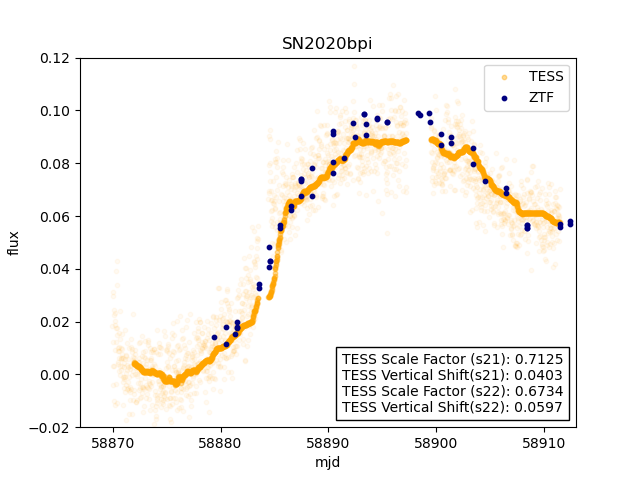

Text(0.5, 1.0, 'SN2020bpi')

In [28]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.set_xlim(sn2020bpi_s21s22['mjd'].min()-3,58913)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.4,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit600(limrange).png',dpi=600)

<IPython.core.display.Javascript object>


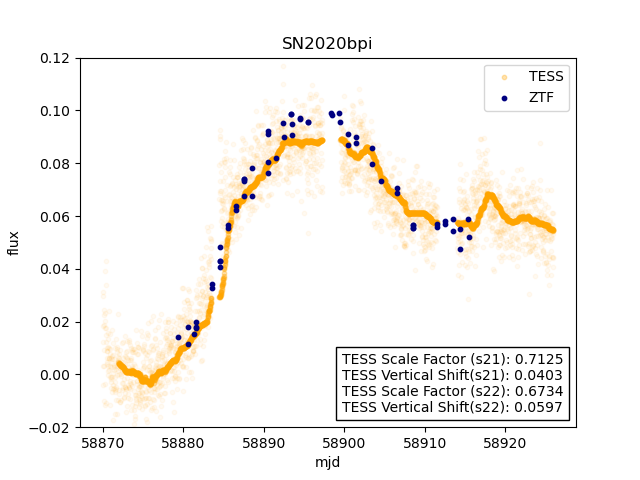

Text(0.5, 1.0, 'SN2020bpi')

In [29]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

<IPython.core.display.Javascript object>


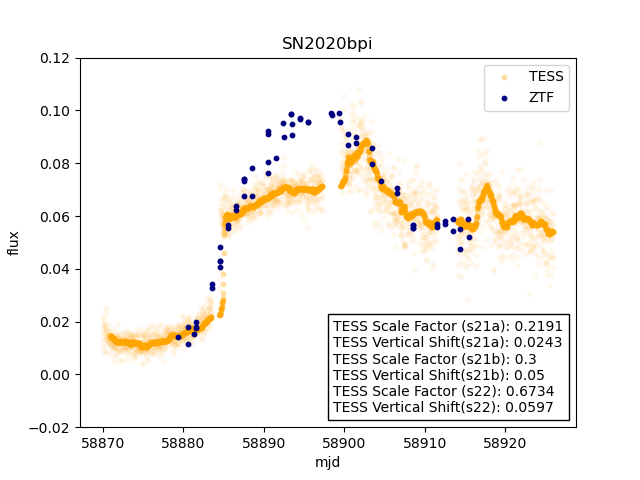

Text(0.5, 1.0, 'SN2020bpi')

In [30]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_3fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_3fit'].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)


plt.legend()
anchText_3fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21a): '+
                                                  np.str(np.around(fluxOptParams_s21a.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21a): '+
                                                  np.str(np.around(fluxOptParams_s21a.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s21b): '+
                                                  np.str(np.around(fluxOptParams_s21b.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21b): '+
                                                  np.str(np.around(fluxOptParams_s21b.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_3fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

<IPython.core.display.Javascript object>


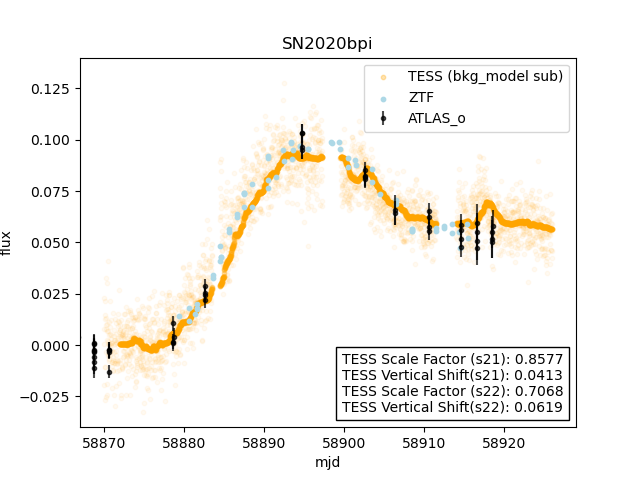

In [31]:
##BKG_MODEL SUBTRACTED VERSION

# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_sub_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi');
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

In [32]:
# def fourierFreqEst(data):
#     sampRate = 1/data['mjd'].diff.median()
#     data_f = fft.fft(data['bkg'].to_numpy())
#     zerosInd = np.argwhere( (data_f[1:] >= 0) & (data_f[:-1] <= 0) )

In [33]:
def sn2020bpi_flux_scale_bkg_add(params, fluxType, timeMin=0,timeMax=0):
    if params[2] <= 0:
        return -np.inf
    else:
        if timeMin !=0 and timeMax !=0:
            avg_ztf_err = [(0.5*(flux_Err[0]+flux_Err[1])) 
                           for flux_Err in sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('sigflux')]]
            return ((sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                    (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                             (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]
                     -params[2]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                             (sn2020bpi_ztf_r.BTJD <timeMax)]['bkg_model_flux']))/avg_ztf_err)
        elif timeMin ==0 and timeMax ==0:
            avg_ztf_err = [(0.5*(flux_Err[0]+flux_Err[1])) 
                           for flux_Err in sn2020bpi_ztf_r[np.str('sigflux')]]
            return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                    (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]
                    -params[2]*sn2020bpi_s21s22_interpolated['bkg_model_flux'])/avg_ztf_err)

In [37]:
fluxOptParams_s21_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s22_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [38]:
fluxOptParams_s21_bkgScale.x, fluxOptParams_s22_bkgScale.x

(array([0.95805961, 0.04270549, 1.52848515]),
 array([5.22311599e-01, 6.17275080e-02, 3.60652326e-10]))

In [39]:
s21_bkg_frac_flux =pd.Series(fluxOptParams_s21_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21_bkgScale.x[1]-
                                     fluxOptParams_s21_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['bkg_model_flux'])
s22_bkg_frac_flux =pd.Series(fluxOptParams_s22_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22_bkgScale.x[1]-
                                     fluxOptParams_s22_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['bkg_model_flux'])
sn2020bpi_s21s22['flux_bkg_model_frac_2fit'] = pd.concat([s21_bkg_frac_flux,s22_bkg_frac_flux])
# sn2020bpi_s21s22['flux_bkg_model_frac_2fit']

In [40]:
s21_bkg_frac_flux_error =pd.Series(fluxOptParams_s21_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux_error'])
s22_bkg_frac_flux_error =pd.Series(fluxOptParams_s22_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux_error'])
sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit'] = pd.concat([s21_bkg_frac_flux_error,s22_bkg_frac_flux_error])
#sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit']

<IPython.core.display.Javascript object>


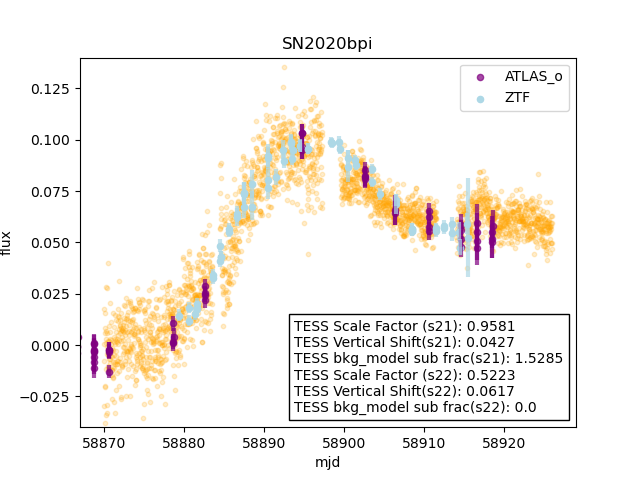

In [41]:
##BKG_MODEL SCALE OPTIMIZATION VERSION

# fig,ax = plt.subplots(1,1)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
errorlinewidth= 3
marker_rad = 20
# ax.scatter(sn2020bpi_s21s22['mjd'],)
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.2,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
# ax.scatter(sn2020bpi_s21s22['mjd'][0::2], 
#            sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
#            color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            linestyle='None',marker="None",
            ecolor='purple',linewidth=errorlinewidth,alpha=0.7)
ax.scatter(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5, 
            color='purple',alpha=0.7,s=marker_rad,label='ATLAS_o')

sn2020bpi_ztf_r['fluxrange'] = [
    (sig[0]+flux,sig[1]+flux)
    for sig,flux in zip(sn2020bpi_ztf_r['sigflux'],sn2020bpi_ztf_r['flux'])
]

sn2020bpi_ztf_r.plot(x='mjd',y='flux',
                     color='lightblue',  
                        kind='scatter',s=marker_rad,label='ZTF',ax=ax)
ax.errorbar(sn2020bpi_ztf_r.mjd,
           sn2020bpi_ztf_r.flux,
            yerr= list(zip(*sn2020bpi_ztf_r["sigflux"])), 
            linestyle='None',marker="None",
            ecolor='lightblue',
            linewidth=errorlinewidth , alpha=0.7)

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[1],4))+
                                                  '\n'+'TESS bkg_model sub frac(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[2],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[1],4))+
                                                 '\n'+'TESS bkg_model sub frac(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[2],4))),
                                           loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi');
#plt.savefig('sn2020bpi_frac_flux_scaled_2fit300.png',dpi=300)
#sn2020bpi_ztf_r['flux'],sn2020bpi_ztf_r['sigflux'], sn2020bpi_ztf_r['fluxrange']

<IPython.core.display.Javascript object>


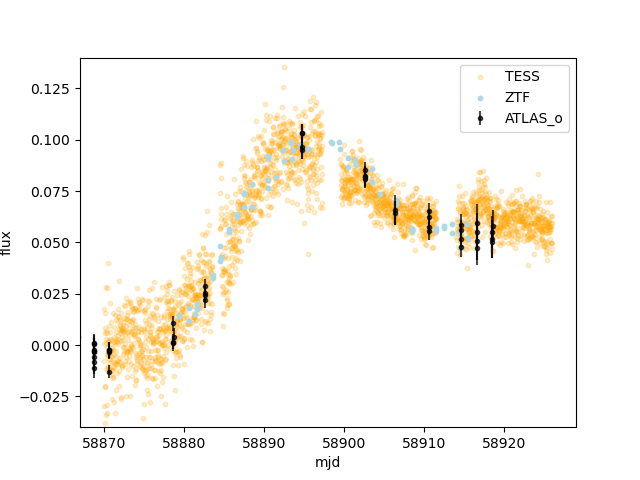

In [42]:
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.2,kind='scatter',s=10,label='TESS')
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
# ax.scatter(sn2020bpi_s21s22['mjd'][0::2], sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
#            color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')
ax.legend()

$$
f(x) = a \left( x-b \right)^2
$$

In [43]:
s21s22_Jha = pd.DataFrame()
s21s22_Jha['BTJD'] = sn2020bpi_s21s22['BTJD']
s21s22_Jha['mjd'] = sn2020bpi_s21s22['mjd']
s21s22_Jha['cts'] = sn2020bpi_s21s22['cts']
s21s22_Jha['e_cts'] = sn2020bpi_s21s22['e_cts']
s21s22_Jha['bkg_model'] = sn2020bpi_s21s22['bkg_model']
s21s22_Jha['raw_flux'] = sn2020bpi_s21s22['flux']
s21s22_Jha['e_raw_flux'] = sn2020bpi_s21s22['flux_error']
s21s22_Jha['bkg_model_flux'] = sn2020bpi_s21s22['bkg_model_flux']
s21s22_Jha['flux'] = sn2020bpi_s21s22['flux_bkg_model_frac_2fit']
s21s22_Jha['e_flux'] = sn2020bpi_s21s22['flux_error_bkg_model_frac_2fit']
#s21s22_Jha.to_csv('./JhaData/TESS_SN2020bpi_Updated.csv',index=False)

In [ ]:
ztf_Jha = pd.DataFrame()
ztf_Jha['BTJD'] = sn2020bpi_ztf_r['BTJD']
ztf_Jha['mjd'] = sn2020bpi_ztf_r['mjd']
ztf_Jha['magap'] = sn2020bpi_ztf_r['magap']
ztf_Jha['sig_magap'] = sn2020bpi_ztf_r['sigmagap']
#ztf_Jha['sig_magap_corr'] = sn2020bpi_ztf_r['sigmagap_corr']
ztf_Jha['flux'] = sn2020bpi_ztf_r['flux']
ztf_Jha['e_flux'] = sn2020bpi_ztf_r['sigflux']
# ztf_Jha.to_csv('./JhaData/ztf_SN2020bpi.csv',index=False)